#### Day 1

In [299]:
import math
import itertools

import numpy as np
import pandas as pd
import networkx as nx

from random import randint
from collections import Counter

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
with open('day1.txt', 'r') as file:
    solution = 0
    for x in file.readlines():
        solution += math.trunc(float(x)/3) -2

solution

3336439

In [4]:
def fuel_calc(num: float) -> float:
    calc = math.trunc(num/3) - 2
    if calc > 0:
        return calc
    else:
        return 0

In [5]:
with open('day1.txt', 'r') as file:
    solution = 0
    for x in file.readlines():
        solution += fuel_calc(float(x))

        add_fuel = fuel_calc(fuel_calc(float(x)))
        solution += add_fuel

        while fuel_calc(add_fuel) > 0: 
            add_fuel = fuel_calc(add_fuel)
            solution += add_fuel

solution

5001791

#### Day 2

In [6]:
with open('day2.txt', 'r') as file:
    intcode = [int(x) for x in file.read().split(',')]
    intcode[1] = 12
    intcode[2] = 2

In [7]:
class IntCode:
    def __init__(self, intcode, noun, verb):
        self.intcode = intcode
        self.noun = noun
        self.verb = verb
    
    @classmethod
    def load_txt(cls, filename):
        with open(filename, 'r') as file:
            return cls(intcode = [int(x) for x in file.read().split(',')], noun = intcode[1], verb = intcode[2])
    
    @staticmethod
    def manual_read(target, test=0):
        x = target[:]
        for num in range(0, len(x), 4):
            current_op = x[num]

            if current_op == 99:
                break
            else:
                input_loc1 = x[num+1]
                input_loc2 = x[num+2]
                output_loc3 = x[num+3]
                if current_op == 1:
                    x[output_loc3] = x[input_loc1] + x[input_loc2]
                elif current_op == 2:
                    x[output_loc3] = x[input_loc1] * x[input_loc2]

            if test == 1:
                break

        return x[0]
    
    def intcodeRead(self, noun=-1, verb=-1, test = 0):
        x = self.intcode[:]
        if noun == -1 or verb == -1:
            print(f'No valid noun/verb pair, using default Noun: {self.noun}, Verb:{self.verb}')
            x[1] = self.noun
            x[2] = self.verb
        else:
            x[1] = noun
            x[2] = verb

        result = self.manual_read(x, test)
        return result

    def brute_force(self, target):
        noun_t = randint(0, 100)
        verb_t = randint(0, 100)
        
        while self.intcodeRead(noun=noun_t, verb=verb_t) != target:
            print(f'Pair noun: {noun_t}, verb: {verb_t}, result = {self.intcodeRead(noun=noun_t, verb=verb_t)}')
            noun_t = randint(0, 100)
            verb_t = randint(0, 100)
            
        print(noun_t, verb_t)

In [8]:
a = IntCode.load_txt('day2.txt')
a.brute_force(19690720)

Pair noun: 27, verb: 74, result = 16234718
Pair noun: 62, verb: 7, result = 36394651
Pair noun: 75, verb: 29, result = 43882673
Pair noun: 86, verb: 41, result = 50218685
Pair noun: 3, verb: 12, result = 2410656
Pair noun: 13, verb: 39, result = 8170683
Pair noun: 99, verb: 88, result = 57706732
Pair noun: 38, verb: 63, result = 22570707
Pair noun: 9, verb: 29, result = 5866673
Pair noun: 9, verb: 48, result = 5866692
Pair noun: 37, verb: 21, result = 21994665
Pair noun: 72, verb: 51, result = 42154695
Pair noun: 31, verb: 7, result = 18538651
Pair noun: 72, verb: 62, result = 42154706
Pair noun: 11, verb: 33, result = 7018677
Pair noun: 68, verb: 62, result = 39850706
Pair noun: 63, verb: 83, result = 36970727
Pair noun: 76, verb: 5, result = 44458649
Pair noun: 17, verb: 5, result = 10474649
Pair noun: 63, verb: 91, result = 36970735
Pair noun: 56, verb: 84, result = 32938728
Pair noun: 37, verb: 76, result = 21994720
Pair noun: 50, verb: 75, result = 29482719
Pair noun: 53, verb: 75

Pair noun: 25, verb: 2, result = 15082646
Pair noun: 33, verb: 66, result = 19690710
Pair noun: 99, verb: 92, result = 57706736
Pair noun: 73, verb: 90, result = 42730734
Pair noun: 8, verb: 7, result = 5290651
Pair noun: 49, verb: 53, result = 28906697
Pair noun: 16, verb: 32, result = 9898676
Pair noun: 13, verb: 28, result = 8170672
Pair noun: 38, verb: 33, result = 22570677
Pair noun: 66, verb: 78, result = 38698722
Pair noun: 100, verb: 7, result = 58282651
Pair noun: 24, verb: 75, result = 14506719
Pair noun: 75, verb: 99, result = 43882743
Pair noun: 40, verb: 95, result = 23722739
Pair noun: 66, verb: 46, result = 38698690
Pair noun: 60, verb: 35, result = 35242679
Pair noun: 3, verb: 67, result = 2410711
Pair noun: 41, verb: 92, result = 24298736
Pair noun: 56, verb: 20, result = 32938664
Pair noun: 54, verb: 100, result = 31786744
Pair noun: 100, verb: 87, result = 58282731
Pair noun: 100, verb: 47, result = 58282691
Pair noun: 3, verb: 50, result = 2410694
Pair noun: 47, ver

#### Day 3

In [9]:
def line_point_cov(string) -> list:
    # ref
    ref = {'R': np.array([1,0]), 'L': np.array([-1,0]), 'U': np.array([0,1]), 'D': np.array([0,-1])}
    
    # clean
    line = [aa.strip() for aa in string.split(',')]
    current_pos = np.array([0,0])    
    
    point_list = [] #from position 1 to end
    endpoints = [current_pos]
    
    for a in line:
        delta = ref[a[0]] * int(a[1:])
        new_pos = current_pos + delta
        
        collect_x = [current_pos[0], new_pos[0]]
        collect_y = [current_pos[1], new_pos[1]]
        
        point_list.extend([(x,y) for x in range(min(collect_x),max(collect_x)+1,1) for y in range(min(collect_y),max(collect_y)+1,1)])
        endpoints.append(new_pos)
        
        current_pos = new_pos
        
    return point_list, endpoints

In [10]:
with open('day3.txt', 'r') as file:
    point_1, end_1 = line_point_cov(file.readline())
    point_2, end_2 = line_point_cov(file.readline())
    line_1 = set(point_1)
    line_2 = set(point_2)

In [11]:
sorted([(x, abs(x[0])+abs(x[1])) for x in line_1.intersection(line_2)], key = lambda x: x[1])

[((0, 0), 0),
 ((-610, 675), 1285),
 ((-517, 777), 1294),
 ((-274, 1105), 1379),
 ((-886, 557), 1443),
 ((-771, 675), 1446),
 ((-274, 1269), 1543),
 ((-999, 557), 1556),
 ((-274, 1286), 1560),
 ((-309, 1411), 1720),
 ((-557, 1201), 1758),
 ((-771, 987), 1758),
 ((-490, 1269), 1759),
 ((-1648, 112), 1760),
 ((-490, 1286), 1776),
 ((-517, 1269), 1786),
 ((-517, 1286), 1803),
 ((-1728, -115), 1843),
 ((-1320, 536), 1856),
 ((-1753, 112), 1865),
 ((-1470, 536), 2006),
 ((-1753, 282), 2035),
 ((-751, 1286), 2037),
 ((-1648, 413), 2061),
 ((-905, 1201), 2106),
 ((-905, 1258), 2163),
 ((-905, 1267), 2172),
 ((-766, 1509), 2275),
 ((-766, 1526), 2292),
 ((-899, 1506), 2405),
 ((-1444, 1051), 2495),
 ((-2674, -53), 2727),
 ((-714, 2037), 2751),
 ((-2674, -237), 2911),
 ((-648, 2290), 2938),
 ((-714, 2290), 3004),
 ((-3076, -53), 3129),
 ((-3110, -53), 3163),
 ((-880, 2290), 3170),
 ((-3429, -97), 3526),
 ((-3429, -198), 3627),
 ((-1944, 1899), 3843),
 ((-3857, -97), 3954),
 ((-3857, -198), 4055

In [12]:
endcop = end_1[1:]
intersections = line_1.intersection(line_2)
intersections.remove((0,0))
new_end1 = [np.array([0, 0])]

for a in endcop:
    for point in intersections:
        align_x = point[0] == new_end1[-1][0]
        align_y = point[1] == new_end1[-1][1]
        
        mod_x = abs(point[0] - new_end1[-1][0])
        mod_y = abs(point[1] - new_end1[-1][1])
        
        if (align_x and mod_y) or (align_y and mod_x):
            new_end1.append(point)
        
    new_end1.append(a)
        

In [13]:
def line_rebuild(endpoints, intersections):
    completed = []

    for a, b in zip(endpoints, endpoints[1:]):
        change_x = abs(a[0] - b[0]) > 0  
        change_y = abs(a[1] - b[1]) > 0  
        intersecting = [a]
        flag_key = None

        for point in intersections:
            align_x = point[0] == a[0]
            align_y = point[1] == a[1]

            if change_x and align_y:
                intersecting.append(np.array(point))
                flag_key = 0
            elif change_y and align_x:
                intersecting.append(np.array(point))
                flag_key = 1

        key_1 = a[flag_key]
        key_2 = b[flag_key]

        if flag_key != None:
            flag_order = True if key_1 > key_2 else False
            intersecting = sorted(intersecting, reverse=flag_order, key = lambda x: x[flag_key])

        completed.extend(intersecting)

    return completed

In [14]:
intersections = line_1.intersection(line_2)
intersections.remove((0,0))

line_rebuild(end_1, intersections)

[array([0, 0]),
 array([995,   0]),
 array([ 995, -933]),
 array([ 711, -933]),
 array([ 711, -353]),
 array([1164, -353]),
 array([1164,    2]),
 array([812,   2]),
 array([812, 365]),
 array([306, 365]),
 array([306, 235]),
 array([606, 235]),
 array([606, 123]),
 array([-145,  123]),
 array([-145,  368]),
 array([ 29, 368]),
 array([  29, 1269]),
 array([-274, 1269]),
 array([-490, 1269]),
 array([-517, 1269]),
 array([-557, 1269]),
 array([-557, 1201]),
 array([-557, 1199]),
 array([-905, 1199]),
 array([-905, 1201]),
 array([-905, 1258]),
 array([-905, 1267]),
 array([-905, 1506]),
 array([-899, 1506]),
 array([-309, 1506]),
 array([-309, 1411]),
 array([-309, 1105]),
 array([-274, 1105]),
 array([   2, 1105]),
 array([  2, 777]),
 array([-517,  777]),
 array([-610,  777]),
 array([-610,  675]),
 array([-610,  563]),
 array([-771,  563]),
 array([-771,  675]),
 array([-771,  987]),
 array([-771, 1051]),
 array([-1444,  1051]),
 array([-1584,  1051]),
 array([-1584,  1349]),
 array

In [15]:
new_line_1 = line_rebuild(end_1, intersections)
new_line_2 = line_rebuild(end_2, intersections)
final_answer3 = {}

for point in intersections:
    up_to_intersect1 = new_line_1[0:[np.array_equal(point,x) for x in new_line_1].index(True) + 1]
    up_to_intersect2 = new_line_2[0:[np.array_equal(point,x) for x in new_line_2].index(True) + 1]
    
    line1_dist = sum([np.sum(abs(a - b)) for a, b in zip(up_to_intersect1, up_to_intersect1[1:])])
    line2_dist = sum([np.sum(abs(a - b)) for a, b in zip(up_to_intersect2, up_to_intersect2[1:])])
    
    final_answer3[point] = line1_dist+line2_dist

In [16]:
final_answer3[min(final_answer3, key=final_answer3.get)]

14228

#### Day 4

In [17]:
## INPUT RANGE FOR PASSWORD 254032-789860
def pass_check(num):
    str_form = str(num)
    flag1 = 0
    flag2 = 1
    
    # never decreases
    for val in range(len(str_form)-1):
        if str_form[val] == str_form[val+1]:
            flag1 = 1
        if int(str_form[val]) > int(str_form[val+1]):
            flag2 = 0
    
    if flag1 == 1 and flag2 == 1:
        return num
    else:
        return None

In [18]:
match_pass = 0
for number in range(254032, 789860+1, 1):
    if pass_check(number):
        match_pass += 1
match_pass

1033

In [19]:
## INPUT RANGE FOR PASSWORD 254032-789860
def modified_pass_check(num):
    str_form = str(num)
    count = Counter(str_form)
    flag1 = 0
    flag2 = 1
    
    # never decreases
    for val in range(len(str_form)-1):
        if str_form[val] == str_form[val+1] and count[str_form[val]] == 2:
            flag1 = 1
        if int(str_form[val]) > int(str_form[val+1]):
            flag2 = 0
    
    if flag1 == 1 and flag2 == 1:
        return num
    else:
        return None

In [20]:
match_pass = 0
for number in range(254032, 789860+1, 1):
    if modified_pass_check(number):
        match_pass += 1
match_pass

670

#### Day 5

In [232]:
class IntCode_v2:
    def __init__(self, intcode, **inputs):
        self.intcode = intcode
        self.work_intcode = intcode[:]
        self.inputs = inputs
        self.output = []
    
    def reset(self):
        self.work_intcode = intcode[:]
        self.output = []
    
    @classmethod
    def load(cls, filename, **inputs):
        with open(filename, 'r') as file:
            return cls([int(x) for x in file.read().split(',')], **inputs)
    
    @classmethod
    def test_txt(cls, text, calc, **inputs):
        test_intcode = cls([int(x) for x in text.split(',')], **inputs)
        test_intcode.intcodeRead(calc, output = 0)
    
    def mode_manage(self, num, mode):
        if mode == 0:
            return self.work_intcode[num]
        elif mode == 1:
            return num
    
    def instr_manage(self, current_idx):
        instr_str = str(self.work_intcode[current_idx])
        params = {x:int(y) for x, y in enumerate(reversed(instr_str[:len(instr_str)-2]))}
        opcode = instr_str[len(instr_str)-2:]
        
#         print(instr_str, opcode)
        
        print(self.work_intcode[current_idx:current_idx+4])
        if int(opcode) == 1:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            self.work_intcode[output_loc] = param_a + param_b
            
            current_idx += 4
            
        elif int(opcode) == 2:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            self.work_intcode[output_loc] = param_a * param_b
            
            current_idx += 4

        elif int(opcode) == 3: 
            move_num = self.work_intcode[current_idx + 1]            
            self.work_intcode[move_num] = self.inputs.get('val', 0)
            
            current_idx += 2
        
        elif int(opcode) == 4:
            val_output = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            self.output.append(val_output)
            
            current_idx += 2
        
        elif int(opcode) == 5:
            check = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            
            if check != 0:
                current_idx = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 6:
            check = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            
            if check == 0:
                current_idx = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 7:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            if param_a < param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
            
            current_idx += 4
        
        elif int(opcode) == 8:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            if param_a == param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
                
            current_idx += 4
        return current_idx
       
    def intcodeRead(self, calc, output = 1):
        current = 0
        
        if calc == 'nv':
            print(
                f'Calculating using NOUN/VERB method\n' 
                f'Noun: {self.inputs.get("noun", 0)}\n' 
                f'Verb: {self.inputs.get("verb", 0)}\n' 
                f"Note: If noun or verb used in inputs are > 99, noun and verb default to intcode's default values"
            )
            self.work_intcode[1] = self.inputs.get('noun', x[1])
            self.work_intcode[2] = self.inputs.get('verb', x[2])
            
        elif calc == 'input':
            print(
                f'Calculating using input method\n'
                f'Note: Default value if "val" variable not in parameters is 0'
            )
        
        while self.work_intcode[current] != 99:
            print(current)
            current = self.instr_manage(current)


        if output == 1:
            return self.work_intcode, output
        else:
            print(self.work_intcode, self.output, self.inputs)

In [233]:
day5 = IntCode_v2.load('day5.txt', val=1)
day5.intcodeRead('input', output = 0)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1101, 1, 238, 225]
10
[104, 0, 1101, 37]
12
[1101, 37, 61, 225]
16
[101, 34, 121, 224]
20
[1001, 224, -49, 224]
24
[4, 224, 102, 8]
26
[102, 8, 223, 223]
30
[1001, 224, 6, 224]
34
[1, 224, 223, 223]
38
[1101, 67, 29, 225]
42
[1, 14, 65, 224]
46
[101, -124, 224, 224]
50
[4, 224, 1002, 223]
52
[1002, 223, 8, 223]
56
[101, 5, 224, 224]
60
[1, 224, 223, 223]
64
[1102, 63, 20, 225]
68
[1102, 27, 15, 225]
72
[1102, 18, 79, 224]
76
[101, -1422, 224, 224]
80
[4, 224, 102, 8]
82
[102, 8, 223, 223]
86
[1001, 224, 1, 224]
90
[1, 223, 224, 223]
94
[1102, 20, 44, 225]
98
[1001, 69, 5, 224]
102
[101, -32, 224, 224]
106
[4, 224, 1002, 223]
108
[1002, 223, 8, 223]
112
[101, 1, 224, 224]
116
[1, 223, 224, 223]
120
[1102, 15, 10, 225]
124
[1101, 6, 70, 225]
128
[102, 86, 40, 224]
132
[101, -2494, 224, 224]
136
[4, 224, 1002, 223]
138
[1002, 223, 8, 223]
142
[101, 6, 224, 224

In [234]:
# day5_2 = IntCode_v2.test_txt('3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,\
# 1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,\
# 999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99', calc='input', val=1)

day5_v2 = IntCode_v2.load('day5.txt', val=5)
day5_v2.intcodeRead('input', output = 0)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1105, 1, 238, 225]
238
[1105, 0, 99999, 1105]
241
[1105, 227, 247, 1105]
247
[1005, 227, 99999, 1005]
250
[1005, 0, 256, 1105]
256
[1106, 227, 99999, 1106]
259
[1106, 0, 265, 1105]
265
[1006, 0, 99999, 1006]
268
[1006, 227, 274, 1105]
274
[1105, 1, 280, 1105]
280
[1, 225, 225, 225]
284
[1101, 294, 0, 0]
288
[105, 1, 0, 1105]
294
[1106, 0, 300, 1105]
300
[1, 225, 225, 225]
304
[1101, 314, 0, 0]
308
[106, 0, 0, 1105]
314
[108, 677, 677, 224]
318
[1002, 223, 2, 223]
322
[1006, 224, 329, 101]
329
[1107, 677, 226, 224]
333
[102, 2, 223, 223]
337
[1006, 224, 344, 101]
344
[8, 677, 677, 224]
348
[1002, 223, 2, 223]
352
[1006, 224, 359, 101]
355
[101, 1, 223, 223]
359
[1008, 677, 677, 224]
363
[1002, 223, 2, 223]
367
[1006, 224, 374, 101]
374
[7, 226, 677, 224]
378
[1002, 223, 2, 223]
382
[1006, 224, 389, 1001]
389
[1007, 677, 677, 224]
393
[1002, 223, 2, 223]
397


#### Day 6

In [235]:
G = nx.read_adjlist('day6.txt', delimiter = ')')

In [236]:
sum(nx.shortest_path_length(G, target = 'COM').values())

171213

In [237]:
#'YOU' node orbiting 
print(G['YOU'])
#'SAN' node orbitinh
print(G['SAN'])

{'9XB': {}}
{'B2L': {}}


In [238]:
nx.shortest_path_length(G, source='9XB', target = 'B2L')

292

#### Day 7

#### Day 8

In [261]:
with open('day8.txt', 'r') as file:
    pic_array = np.array([int(x) for x in file.read().strip()]).reshape((-1, 6, 25))

6

In [278]:
eval_dict = {0:9999999999, 1:0, 2:0}
layer = {}

for idx, array in enumerate(pic_array):
    calc = Counter(array.flatten())
    if calc[0] < eval_dict[0]:
        eval_dict[0], eval_dict[1], eval_dict[2] = calc[0], calc[1], calc[2]
    layer[idx] = calc[0]

eval_dict, eval_dict[1] * eval_dict[2]

({0: 7, 1: 12, 2: 131}, 1572)

In [279]:
pic_array

array([[[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 0, 2, 2],
        [2, 0, 2, ..., 0, 2, 2],
        [2, 2, 0, ..., 2, 1, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 1, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 1]],

       [[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 0, 2, 2],
        [2, 2, 0, ..., 2, 2, 1]],

       ...,

       [[0, 2, 0, ..., 0, 1, 2],
        [2, 2, 0, ..., 0, 1, 1],
        [2, 1, 2, ..., 2, 1, 2],
        [2, 0, 2, ..., 0, 1, 0],
        [1, 0, 2, ..., 1, 1, 2],
        [0, 2, 2, ..., 2, 0, 2]],

       [[1, 2, 1, ..., 2, 0, 1],
        [0, 2, 1, ..., 1, 2, 1],
        [2, 0, 2, ..., 2, 0, 1],
        [2, 1, 0, ..., 1, 2, 2],
        [1, 2, 1, ..., 1, 1, 2],
        [0, 2, 2, ...,

In [307]:
imagekeeper = np.full(shape = (6,25), fill_value = 2)

for row, col in itertools.product(range(6), range(25)):
    for array in pic_array:
        cur_val = array[row][col]
        
        if cur_val != 2:
            imagekeeper[row][col] = cur_val
            break

In [308]:
imagekeeper

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0]])

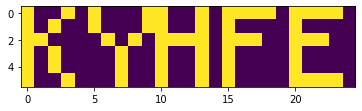

In [309]:
plt.imshow(imagekeeper, interpolation='nearest')
plt.show()